In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#list of useful libraries required for the project
import os
import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
from glob import glob
import seaborn as sns
import random
from keras.preprocessing import image
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,GlobalAvgPool2D,GlobalMaxPooling2D
from keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [39]:
data = !unrar x /content/drive/MyDrive/DATASET.rar

In [41]:
from pathlib import Path
data = Path(r'/content/DATASET/Dataset')
for folder in os.listdir(data):
    list_of_elements = os.listdir(os.path.join(data, folder))
    print(f'Folder: {folder}\n')
    print(f'Number of Images: {len(list_of_elements)}\n')
    print()

Folder: Non_Bio_degradable

Number of Images: 1496


Folder: Bio_degradable

Number of Images: 1496




In [42]:
images=[]
import os
for dirname,_,filenames in os.walk(data):
  for filename in filenames:
    file_name, file_extension = os.path.splitext(filename)
    if file_extension == '.db':
      continue
    else:
      img=os.path.join(dirname,filename)
      images.append(img)

In [43]:
images[:20]

['/content/DATASET/Dataset/Non_Bio_degradable/TRAIN.1_NBIODEG_CCW_221.jpg',
 '/content/DATASET/Dataset/Non_Bio_degradable/TRAIN.1_NBIODEG_CCW_356.jpg',
 '/content/DATASET/Dataset/Non_Bio_degradable/TRAIN.1_NBIODEG_CCW_202.jpg',
 '/content/DATASET/Dataset/Non_Bio_degradable/TRAIN.1_NBIODEG_CCW_519.jpg',
 '/content/DATASET/Dataset/Non_Bio_degradable/TRAIN.1_NBIODEG_CCW_390.jpg',
 '/content/DATASET/Dataset/Non_Bio_degradable/TRAIN.1_NBIODEG_CCW_161.jpg',
 '/content/DATASET/Dataset/Non_Bio_degradable/TRAIN.1_NBIODEG_CCW_254.jpg',
 '/content/DATASET/Dataset/Non_Bio_degradable/TRAIN.1_NBIODEG_CCW_1054.jpg',
 '/content/DATASET/Dataset/Non_Bio_degradable/TRAIN.1_NBIODEG_CCW_700.jpg',
 '/content/DATASET/Dataset/Non_Bio_degradable/TRAIN.1_NBIODEG_CCW_1307.jpg',
 '/content/DATASET/Dataset/Non_Bio_degradable/TRAIN.1_NBIODEG_CCW_602.jpg',
 '/content/DATASET/Dataset/Non_Bio_degradable/TRAIN.1_NBIODEG_CCW_198.jpg',
 '/content/DATASET/Dataset/Non_Bio_degradable/TRAIN.1_NBIODEG_CCW_69.jpg',
 '/content/

In [44]:
len(images)

2992

In [45]:
class_values = []
for i in images:
    j = i.split('/')
    class_values.append(j[-2])

In [46]:
class_values[:10]

['Non_Bio_degradable',
 'Non_Bio_degradable',
 'Non_Bio_degradable',
 'Non_Bio_degradable',
 'Non_Bio_degradable',
 'Non_Bio_degradable',
 'Non_Bio_degradable',
 'Non_Bio_degradable',
 'Non_Bio_degradable',
 'Non_Bio_degradable']

In [47]:
len(class_values)

2992

In [48]:
import random # Import the random module at the beginning of the cell
temp = list(zip(images,class_values))
random.shuffle(temp)
images, class_values = zip(*temp)
data = pd.DataFrame(list(zip(images, class_values)), columns=['image_path', 'Class_label'])

In [49]:
data

,image_path,Class_label
0,/content/DATASET/Dataset/Bio_degradable/TRAIN....,Bio_degradable
1,/content/DATASET/Dataset/Bio_degradable/TRAIN....,Bio_degradable
2,/content/DATASET/Dataset/Non_Bio_degradable/TR...,Non_Bio_degradable
3,/content/DATASET/Dataset/Bio_degradable/TRAIN....,Bio_degradable
4,/content/DATASET/Dataset/Bio_degradable/TRAIN....,Bio_degradable
...,...,...
2987,/content/DATASET/Dataset/Bio_degradable/TRAIN....,Bio_degradable
2988,/content/DATASET/Dataset/Non_Bio_degradable/TR...,Non_Bio_degradable
2989,/content/DATASET/Dataset/Bio_degradable/TRAIN....,Bio_degradable
2990,/content/DATASET/Dataset/Bio_degradable/TRAIN....,Bio_degradable


In [50]:
data.shape

(2992, 2)

In [51]:
data.Class_label.value_counts()

,count
Class_label,
Bio_degradable,1496
Non_Bio_degradable,1496


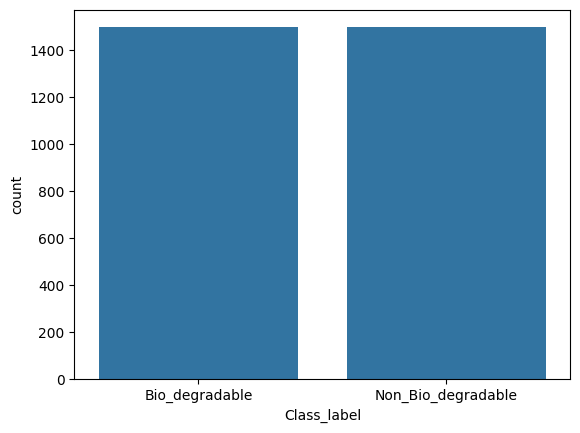

In [52]:
sns.countplot(x = data.Class_label, data = data)
plt.show()

In [53]:
df = data

In [54]:
import os
from PIL import Image

In [55]:
def resize_images(img):
  file = Image.open(img)
  img = file.convert('RGB')
  img_bgr= img.resize((224, 224))
  img_bgr = np.array(img_bgr)
  return img_bgr

In [56]:
#save resized images into images.
images = [resize_images(img) for img in df['image_path']]

In [57]:
images

[array([[[ 79,  76,  93],
         [206, 203, 220],
         [255, 254, 255],
         ...,
         [217, 236, 234],
         [202, 220, 220],
         [178, 198, 197]],
 
        [[ 71,  68,  85],
         [195, 192, 209],
         [242, 239, 254],
         ...,
         [216, 234, 233],
         [210, 228, 228],
         [210, 230, 229]],
 
        [[ 60,  57,  75],
         [182, 179, 197],
         [202, 199, 218],
         ...,
         [224, 241, 240],
         [218, 237, 237],
         [215, 234, 234]],
 
        ...,
 
        [[ 58,  46,  50],
         [ 60,  49,  52],
         [ 56,  45,  48],
         ...,
         [247, 235, 210],
         [241, 231, 209],
         [233, 222, 200]],
 
        [[ 67,  58,  58],
         [ 64,  54,  55],
         [ 55,  46,  46],
         ...,
         [246, 234, 209],
         [225, 215, 193],
         [198, 190, 167]],
 
        [[ 73,  63,  62],
         [ 70,  60,  59],
         [ 58,  49,  49],
         ...,
         [224, 214, 188],
  

In [58]:
# print number of classes in our dataset
num_classes = len(np.unique(data['Class_label']))

In [59]:
num_classes

2

In [60]:
# save the class into class_names
class_names = list(data['Class_label'])

In [61]:
# Print the shape of the image
images[0].shape

(224, 224, 3)

Text(0.5, 1.0, 'Non_Bio_degradable')

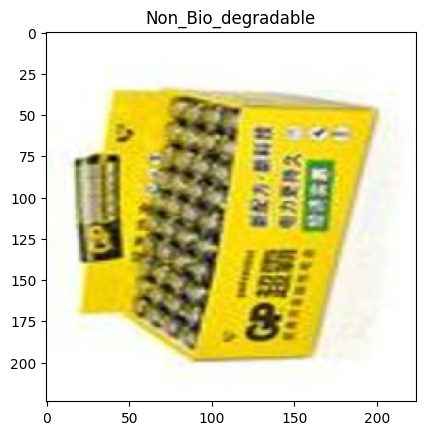

In [62]:
#See the image with class label
plt.imshow(images[80])
plt.title(class_names[80])

Text(0.5, 1.0, 'Bio_degradable')

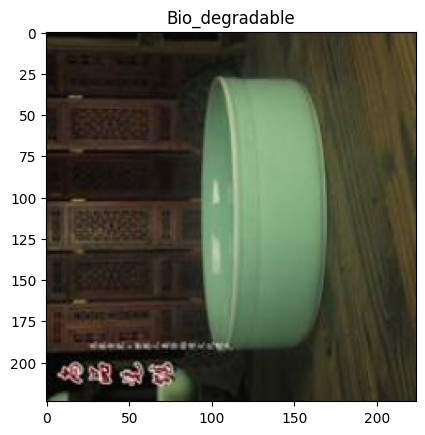

In [63]:
#See the image with class label
plt.imshow(images[400])
plt.title(class_names[500])

In [64]:
# Convert the images into array
images =  np.array(images)

In [65]:
# Shape of the images
images.shape

(2992, 224, 224, 3)

In [66]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
Y = enc.fit_transform(df['Class_label'])
from keras.utils  import to_categorical
y = to_categorical(Y)

In [67]:
enc.classes_

array(['Bio_degradable', 'Non_Bio_degradable'], dtype=object)

In [68]:
y[:10]

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [69]:
y.shape

(2992, 2)

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, y, test_size=0.3,stratify = y,random_state=42)

In [71]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import os

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Loading Data
train_generator = train_datagen.flow(
    X_train, y_train, batch_size=32, shuffle=True
)
valid_generator = test_datagen.flow(
    X_test, y_test, batch_size=32, shuffle=False
)

# Compute class weights for handling imbalance
y_train_classes = np.argmax(y_train, axis=1)
class_weights = compute_class_weight(
    "balanced", classes=np.unique(y_train_classes), y=y_train_classes
)
class_weights = dict(enumerate(class_weights))
print("Class Weights: ", class_weights)

# Building the AlexNet Model
model = Sequential([
    Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D((3, 3), strides=2),

    Conv2D(256, (5, 5), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((3, 3), strides=2),

    Conv2D(384, (3, 3), activation='relu', padding='same'),
    Conv2D(384, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((3, 3), strides=2),

    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # 2 classes
])

# Compile the model
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

# Callbacks
early_stop = EarlyStopping(
    monitor="val_loss", patience=8, restore_best_weights=True
)
reduce_lr = ReduceLROnPlateau(
    monitor="val_loss", factor=0.2, patience=4, min_lr=1e-6
)

# Train the model
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=10,
    class_weight=class_weights,
    callbacks=[early_stop, reduce_lr],
)



Class Weights:  {0: np.float64(1.0), 1: np.float64(1.0)}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 45s 570ms/step - accuracy: 0.6013 - loss: 3.3955 - val_accuracy: 0.5100 - val_loss: 0.6983 - learning_rate: 0.0010
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 35s 520ms/step - accuracy: 0.7285 - loss: 0.6554 - val_accuracy: 0.6347 - val_loss: 0.6792 - learning_rate: 0.0010
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 27s 403ms/step - accuracy: 0.7342 - loss: 0.5545 - val_accuracy: 0.7572 - val_loss: 0.5865 - learning_rate: 0.0010
Epoch 4/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 41s 406ms/step - accuracy: 0.7130 - loss: 0.5973 - val_accuracy: 0.7851 - val_loss: 0.5688 - learning_rate: 0.0010
Epoch 5/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 27s 415ms/step - accuracy: 0.7681 - loss: 0.5172 - val_accuracy: 0.7416 - val_loss: 0.5238 - learning_rate: 0.0010
Epoch 6/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 26s 395ms/step - accuracy: 0.7948 - loss: 0.4693 - val_accuracy: 0.7962 - val_loss: 0.4536 - learning_rate: 0.0010
Epoch 7/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 26s 393ms/step - accuracy: 0.8124 - loss: 0.

In [72]:
# Fine-tuning: Re-train with a lower learning rate
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

history_fine = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=10,
    class_weight=class_weights,
    callbacks=[early_stop, reduce_lr],
)

Epoch 1/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 90s 473ms/step - accuracy: 0.8230 - loss: 0.4285 - val_accuracy: 0.8007 - val_loss: 0.4419 - learning_rate: 1.0000e-05
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 33s 399ms/step - accuracy: 0.8340 - loss: 0.4127 - val_accuracy: 0.8018 - val_loss: 0.4386 - learning_rate: 1.0000e-05
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 26s 400ms/step - accuracy: 0.8137 - loss: 0.4460 - val_accuracy: 0.8062 - val_loss: 0.4361 - learning_rate: 1.0000e-05
Epoch 4/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 41s 401ms/step - accuracy: 0.8046 - loss: 0.4303 - val_accuracy: 0.8062 - val_loss: 0.4320 - learning_rate: 1.0000e-05
Epoch 5/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 26s 399ms/step - accuracy: 0.8273 - loss: 0.4080 - val_accuracy: 0.8118 - val_loss: 0.4218 - learning_rate: 1.0000e-05
Epoch 6/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 25s 385ms/step - accuracy: 0.8218 - loss: 0.4242 - val_accuracy: 0.8163 - val_loss: 0.4165 - learning_rate: 1.0000e-05
Epoch 7/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 26s 391ms/step - acc

In [73]:
# Evaluate the model
loss, accuracy = model.evaluate(valid_generator)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8276 - loss: 0.3919
Validation Accuracy: 82.52%


In [74]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Predict on the validation data
y_pred = model.predict(valid_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels

# Access true labels from y_test
y_true_classes = np.argmax(y_test, axis=1)  # True class labels

# Print classification report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=enc.classes_))  # Use enc.classes_ for class names

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step
Classification Report:
                    precision    recall  f1-score   support

    Bio_degradable       0.79      0.89      0.84       449
Non_Bio_degradable       0.87      0.76      0.81       449

          accuracy                           0.83       898
         macro avg       0.83      0.83      0.82       898
      weighted avg       0.83      0.83      0.82       898



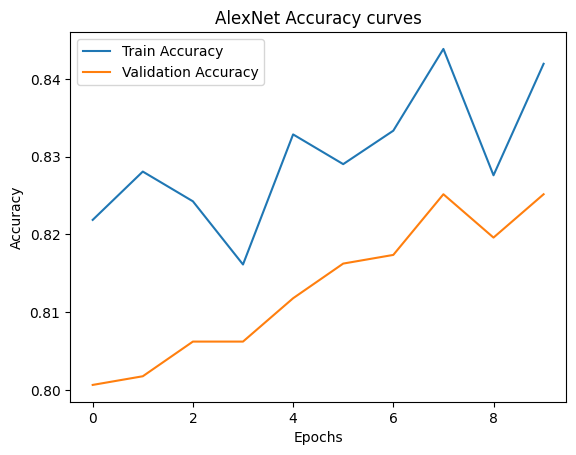

In [75]:
# Plot training and validation accuracy
plt.plot(history_fine.history["accuracy"], label="Train Accuracy")
plt.plot(history_fine.history["val_accuracy"], label="Validation Accuracy")
plt.title("AlexNet Accuracy curves")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

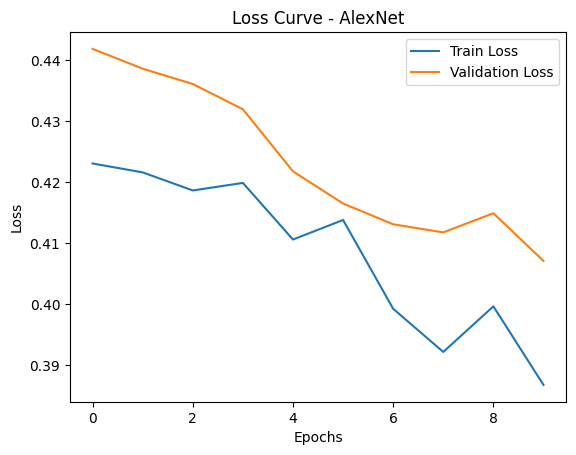

In [76]:
# Loss Plot
plt.plot(history_fine.history['loss'], label='Train Loss')
plt.plot(history_fine.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve - AlexNet')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


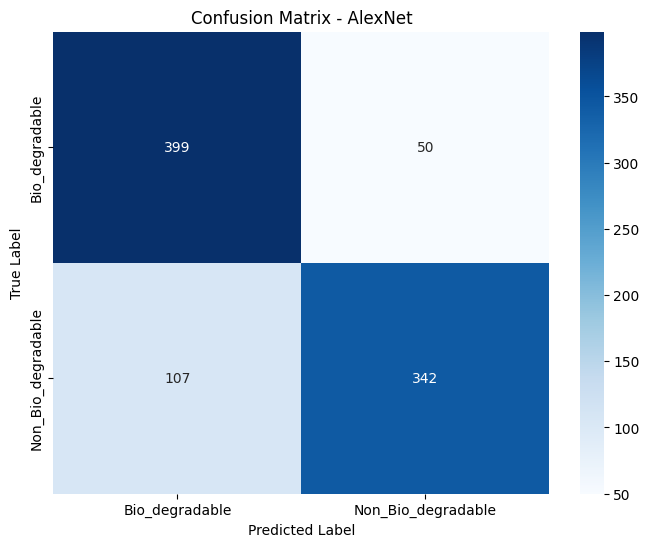

In [77]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict on the validation data
y_pred = model.predict(valid_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels

# Access true labels from y_test
y_true_classes = np.argmax(y_test, axis=1)  # True class labels

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=enc.classes_,  # Use enc.classes_ for class names
    yticklabels=enc.classes_,  # Use enc.classes_ for class names
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - AlexNet")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted class: Non_Bio_degradable
Actual class: Non_Bio_degradable


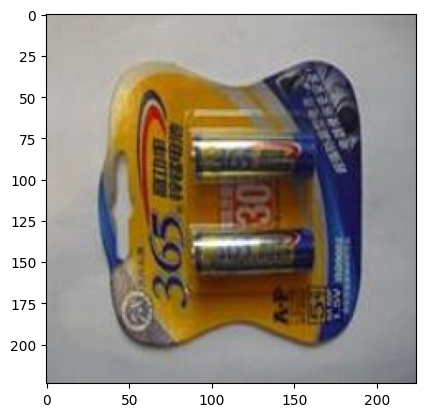

In [78]:
i = 5
pred = np.argmax(model.predict(np.array([X_test[i]]))[0])
act = np.argmax(y_test[i])
print("Predicted class: {}".format(enc.classes_[pred]))
print("Actual class: {}".format(enc.classes_[act]))
plt.imshow(X_test[i])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Predicted class: Non_Bio_degradable
Actual class: Non_Bio_degradable


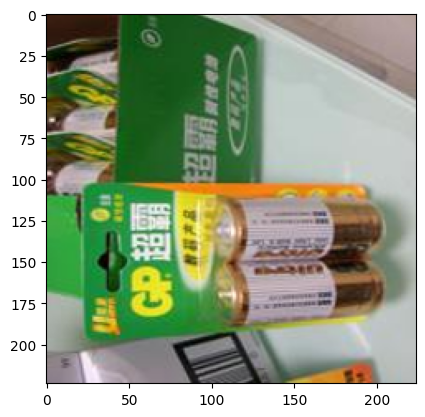

In [92]:
i = 58
pred = np.argmax(model.predict(np.array([X_test[i]]))[0])
act = np.argmax(y_test[i])
print("Predicted class: {}".format(enc.classes_[pred]))
print("Actual class: {}".format(enc.classes_[act]))
plt.imshow(X_test[i])

In [93]:
model.save("Alexnet.h5")